In [3]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA from WORDMETERS

In [14]:
new_data, df_final = scrap_data.load_data()

In [15]:
new_data.sort_values(by='Confirmed', ascending=False).head(30).reset_index(drop=True)

,Date_last_updated_AEDT,date,countryname,Confirmed,Deaths,Recovered
0,7/20/2020 09:06,2020-07-20,0,14669595,609531,8752149
1,7/20/2020 09:06,2020-07-20,World,14669595,609531,8752149
2,7/20/2020 09:06,2020-07-20,US,3898694,143289,1802393
3,7/20/2020 09:06,2020-07-20,Brazil,2099896,79533,1371229
4,7/20/2020 09:06,2020-07-20,India,1119412,27514,700647
5,7/20/2020 09:06,2020-07-20,Russia,777486,12427,553602
6,7/20/2020 09:06,2020-07-20,South Africa,364328,5033,191059
7,7/20/2020 09:06,2020-07-20,Peru,353590,13187,241955
8,7/20/2020 09:06,2020-07-20,Mexico,344224,39184,217423
9,7/20/2020 09:06,2020-07-20,Chile,330930,8503,301794


In [16]:
df_wordmeters = io.load_total_table()
df_wordmeters = manipulation.create_all_country_total_data(df_wordmeters, vars = ['confirmed','deaths','recovered','active'])


In [17]:
df_wordmeters.sort_values(by='confirmed', ascending=False).reset_index(drop=True)['countrycode'].unique()

array(['US', 'BR', 'IN', 'RU', 'ZA', 'PE', 'MX', 'CL', 'UK', 'ES', 'IR',
       'PK', 'SA', 'IT', 'TR', 'BD', 'DE', 'CO', 'FR', 'AR', 'CA', 'QA',
       'IQ', 'ID', 'EG', 'CN', 'SE', 'EC', 'KZ', 'PH', 'OM', 'BY', 'BE',
       'KW', 'BO', 'UA', 'AE', 'PA', 'DO', 'NL', 'IL', 'PT', 'SG', 'PL',
       'GT', 'RO', 'NG', 'BH', 'AF', 'AM', 'HN', 'CH', 'GH', 'AZ', 'KG',
       'IE', 'JP', 'DZ', 'MD', 'RS', 'AT', 'NP', 'MA', 'UZ', 'CM', 'CI',
       'KR', 'KE', 'DK', 'SV', 'AU', 'VE', 'CR', 'SD', 'ET', 'NO', 'PS',
       'SN', 'MY', 'BG', 'BA', 'FI', 'GN', 'GA', 'MR', 'LU', 'DJ', 'HR',
       'HU', 'AL', 'GR', 'PY', 'ZM', 'TH', 'NI', 'SO', 'GQ', 'MV', 'LB',
       'LK', 'CG', 'CU', 'ME', 'EE', 'SK', 'SI', 'LT', 'IS', 'BJ', 'RW',
       'NZ', 'TN', 'JO', 'LV', 'NE', 'LR', 'UY', 'BF', 'GE', 'CY', 'SR',
       'TD', 'AD', 'JM', 'TG', 'SM', 'MT', 'TZ', 'TW', 'VN', 'GY', 'MN',
       'KH', 'BS', 'BN', 'TT', 'MC', 'SC', 'BB', 'GM', 'BT', 'LI', 'AG',
       'FJ', 'LC', 'VA'], dtype=object)

## European Centre for Disease Prevention and Contro

https://data.europa.eu/euodp/en/data/dataset/covid-19-coronazvirus-data

In [18]:
# df_eucenter = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
# dd = manipulation.manipulate_eucenter(df_eucenter)

### Generate Graphs for Multiple Countrys

In [19]:
df = df_wordmeters.copy()

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']
mask_countrys = df['countrycode'].isin(codes)

In [20]:
from scripts import vis_layout
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)

themes = themes['all_countrys']
for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.all_countrys(df[mask_countrys], var, scale, themes, save=False)
        
#         plot(fig, filename=f"../images/multipleCountry/{var}_{scale}.html", auto_open=False)
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/multipleCountry/{var}_{scale}.html", auto_open=False)


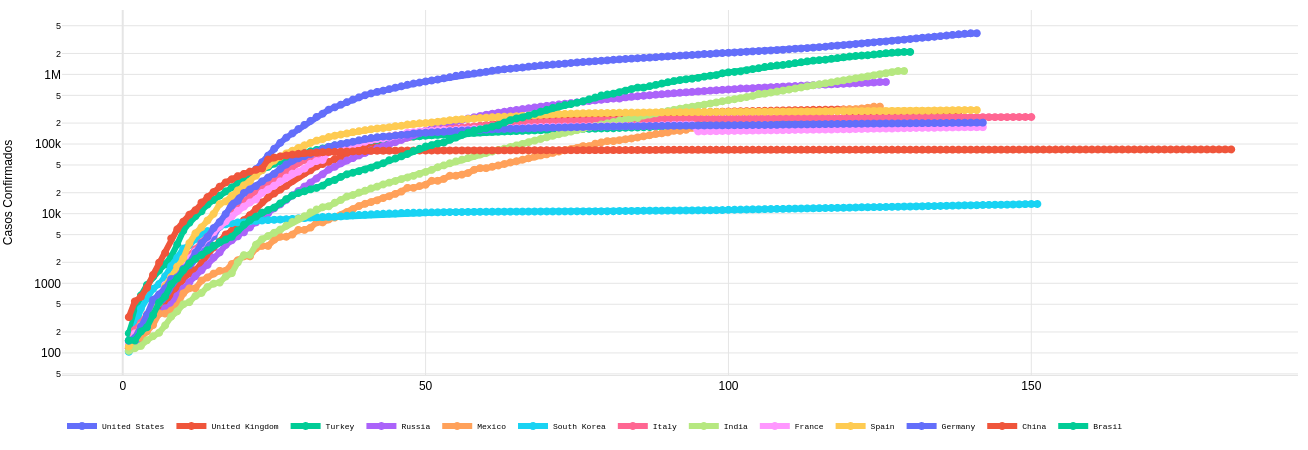

In [21]:
fig

## By Country

In [22]:
df = df_wordmeters.copy()

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_daily']

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']

# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_daily.html", auto_open=False)


themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_cum']
# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_cum.html", auto_open=False)


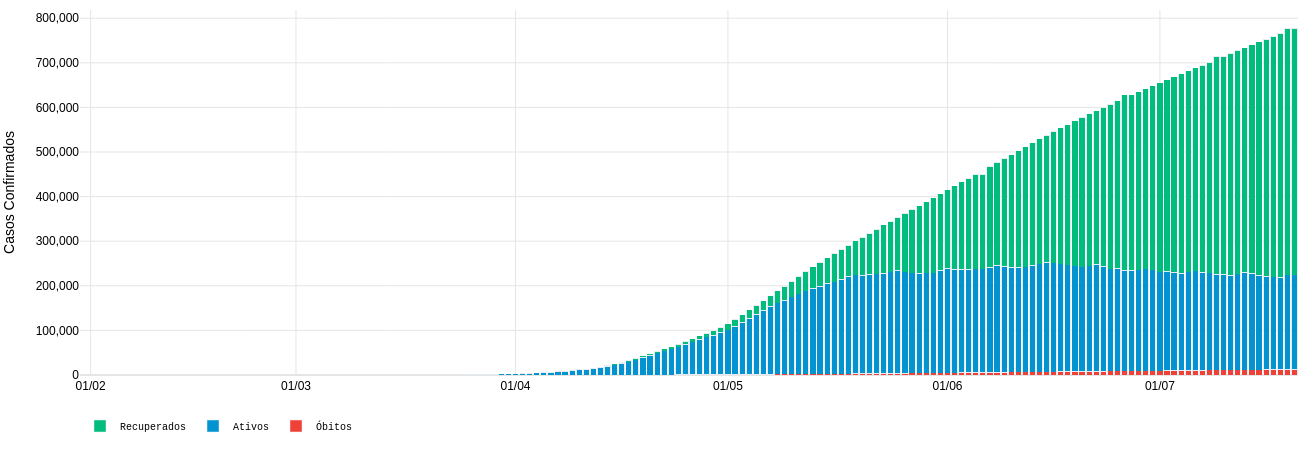

In [23]:
fig

## Estados

In [24]:
from scripts.io import read_sheets
from scripts import manipulation
config = yaml.load(open('../configs/config.yaml', 'r'), Loader=yaml.FullLoader)

io.update_ms_data()
print('io done!')

df = pd.read_csv("../data/ministerio_da_saude/last_data_ms_covid19.csv")

df_states = manipulation.manipule_mytable(df,config['ms_table'])

print("States table, Done!")

[WDM] - There is no [linux64] geckodriver for browser  in cache
[WDM] - Getting latest mozilla release info for v0.26.0
[WDM] - Trying to download new driver from https://github.com/mozilla/geckodriver/releases/download/v0.26.0/geckodriver-v0.26.0-linux64.tar.gz
[WDM] - Driver has been saved in cache [/home/m/.wdm/drivers/geckodriver/linux64/v0.26.0]


downloaded
renamed
130.07318377494812
8.91288948059082
saved
io done!
States table, Done!


## Multiple

In [25]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cumulative']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(df_states, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/cumulative/{var}_{scale}.html", auto_open=False)


## Diario

In [26]:
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_daily']

codes = df_states['state'].unique()

for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_daily.html", auto_open=False)
    
    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cum']


for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_cum.html", auto_open=False)

## Cidades

In [27]:
from scripts import io

!rm '../data/brIO/caso_full.csv'

!cd '../data/brIO/'
!wget 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz' -P ../data/brIO/
!gunzip '../data/brIO/caso_full.csv.gz'


brio, brio_raw = io.load_brasilIO()

print("Br.IO table, Done!")

--2020-07-20 09:10:06--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 172.67.71.45, 104.26.9.175, 104.26.8.175, ...
Connecting to data.brasil.io (data.brasil.io)|172.67.71.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10143558 (9,7M) [application/gzip]
Saving to: ‘../data/brIO/caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]   9,67M  3,04MB/s    in 3,2s    

2020-07-20 09:10:10 (3,04 MB/s) - ‘../data/brIO/caso_full.csv.gz’ saved [10143558/10143558]

Br.IO table, Done!


In [28]:
### Load Cities
cities = io.load_cities(brio_raw)

In [29]:
cities.tail()

,date,city,confirmed,new_confirmed,deaths,new_deaths
371,2020-06-24,São José dos Campos,2462.0,97.0,84.0,2.0
372,2020-06-25,São José dos Campos,2561.0,99.0,86.0,2.0
373,2020-06-26,São José dos Campos,2750.0,189.0,87.0,1.0
374,2020-06-27,São José dos Campos,2763.0,13.0,87.0,0.0
375,2020-06-28,São José dos Campos,2763.0,0.0,87.0,0.0


## Multiple Cities

In [30]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(cities, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/cumulative/{var}_{scale}.html", auto_open=False)


## Diario


In [31]:
import unidecode

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_daily']

codes = ['São Paulo', 'Taubaté', 'São José dos Campos']

for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_daily.html", auto_open=False)

    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_cum']
for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_cum.html", auto_open=False)
    print(unidecode.unidecode(state.replace(' ','_').lower()))

sao_paulo
taubate
sao_jose_dos_campos


### Figures to UP

In [32]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])